# Preamble 

In [1]:
%matplotlib inline 

import os
# os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WeakLensingDeblending/')
os.chdir('/Users/Ismael/code/lensing/WeakLensingDeblending/')

import pickle 
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble

from importlib import reload
reload(tomo_fncs)
reload(errors)
reload(preamble)

<module 'mycode.preamble' from '/Users/Ismael/code/lensing/WeakLensingDeblending/mycode/preamble.py'>

# Functions 

In [2]:

# def get_weights(args, component, iso_or_grp): 
#     suffix = get_iso_or_grp_suffix(iso_or_grp)
#     shape_noise = np.std(args[f'e{component}'])**2 
#     weights = (shape_noise + args[f'dg{component}{suffix}']**2)**(-1)
    
#     return weights 


# def wmean_func(dbt, cat, component, iso_or_grp):
#     assert component in ['1','2'], 'component value is not valid. '
#     assert iso_or_grp in ['iso', 'grp'], 'iso_or_grp received invalied argument'
    
#     suffix = get_iso_or_grp_suffix(iso_or_grp)
#     weights = get_weights(args, component, iso_or_grp)
#     return np.sum(weights*dbt)/np.sum(weights) 

# def wmean(dbt, args, component, iso_or_grp): 
#     return lambda dbt: wmean_func(dbt, args, component, iso_or_grp)

#param is usually one of the biases. 
def get_iso_or_grp_suffix(iso_or_grp):
    suffix = ''
    if iso_or_grp == 'grp': 
        suffix = '_grp'
        
    return suffix 

def get_weights(ids, cat, component, iso_or_grp, which_shape_noise='component'): 
    suffix = get_iso_or_grp_suffix(iso_or_grp)
    
    if which_shape_noise=='component': 
        shape_noise = np.std(cat[f'e{component}'][ids])**2
    elif which_shape_noise=='magnitude': 
        shape_noise = np.std(np.sqrt(cat['e1'][ids]**2 + cat['e2'][ids]**2))**2
        
        
    weights = (shape_noise + cat[f'dg{component}{suffix}'][ids]**2)**(-1)
    
    return weights 

#which_shape_noise in []'component','magnitude'
def wmean(ids, cat, component, iso_or_grp, which_shape_noise):
    assert component in ['1','2'], 'component value is not valid. '
    assert iso_or_grp in ['iso', 'grp'], 'iso_or_grp received invalied argument'
    assert which_shape_noise in ['component', 'magnitude'], 'invalid agument for which_shape_noise'
    
    suffix = get_iso_or_grp_suffix(iso_or_grp)
    weights = get_weights(ids, cat, component, iso_or_grp, which_shape_noise)
    param = f'bias_g{component}{suffix}'
    dbt = cat[param][ids]
    return np.sum(weights*dbt)/np.sum(weights)



def clipped_mean(ids, cat, param, p): 
    dbt = cat[param][ids]
    
    if p == 0.5: 
        return np.median(dbt)
    
    q1 = np.quantile(dbt, p)
    q2 = np.quantile(dbt, 1-p)
    cut_dbt = cut_both(dbt, q1, q2)
    mean = np.mean(cut_dbt)
    return mean 


#all catalogues must be same size (so ids make sense) and sorted. 
def get_errors(orig_ids, cats, fnc, N=1000, args=[]): 
    results = boots_fnc(orig_ids, cats, fnc, N, args)
    return [np.std(cat_results) for cat_results in results]




def cut_both(dbt, cut1, cut2): 
    return dbt[(dbt>=cut1)&(dbt<=cut2)]

# Catalogues to use 

In [4]:
scats = pickle.load(open('mycode/selection_cats1.p', 'rb') ,encoding='latin1')

#sorting is important and saves time later. 
_ = [cat.sort('db_id') for cat in scats ]

In [6]:
scats_small = [scats[4], scats[8]]
cat = scats[4]
orig_ids = list(range(len(cat)))

(array([12018., 11912., 12024., 11961., 12202., 11811., 11713., 11821.,
        11678., 11806.]),
 array([-1.7999513e+03, -1.4399622e+03, -1.0799729e+03, -7.1998370e+02,
        -3.5999451e+02, -5.3100586e-03,  3.5998389e+02,  7.1997308e+02,
         1.0799623e+03,  1.4399514e+03,  1.7999407e+03], dtype=float32),
 <a list of 10 Patch objects>)

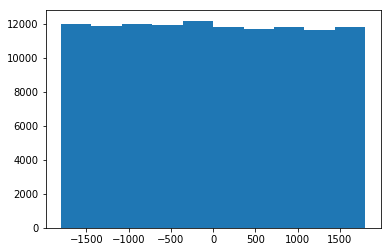

In [6]:
plt.hist(scats[4]['dx'])

# Weighted means scatter plot  

In [251]:
def weights_bias_scatter(cats, cat_number, component, iso_or_grp, which_shape_noise, xlabel=None, title=None, xlim=(-5,5), size_dots=0.5): 
    plt.figure(figsize=(10,10)) 
    cat = cats[cat_number]
    orig_ids = list(range(len(cat)))
    weights = get_weights(orig_ids, cat,  component, iso_or_grp, which_shape_noise)
    suffix = get_iso_or_grp_suffix(iso_or_grp)

    plt.scatter(cat[f'bias_g{component}{suffix}'], weights, alpha=1, s=size_dots, c='b')
    plt.title(title, size = 18 )
    plt.xlabel(xlabel, size=18)
    plt.ylabel('Weights', size=18)
    plt.xlim(xlim)

        # plt.scatter(cat2['bias_g1'], weights2, alpha=1, s=0.5, label= 'g=0.2', c= 'r')
#     lines = [plt.Circle((0, 0), 0.2, color='b')]
#     labels= ['g=0']

#     plt.legend(lines, labels, prop={'size':20},loc='best')



In [ ]:
def weights_bias_scatter(cats, cat_number, component, iso_or_grp, which_shape_noise, xlabel=None, title=None, xlim=(-5,5), size_dots=0.5): 
    plt.figure(figsize=(10,10)) 
    cat = cats[cat_number]
    orig_ids = list(range(len(cat)))
    weights = get_weights(orig_ids, cat,  component, iso_or_grp, which_shape_noise)
    suffix = get_iso_or_grp_suffix(iso_or_grp)

    plt.scatter(cat[f'bias_g{component}{suffix}'], weights, alpha=1, s=size_dots, c='b')
    plt.title(title, size = 18 )
    plt.xlabel(xlabel, size=18)
    plt.ylabel('Weights', size=18)
    plt.xlim(xlim)

In [18]:
np.max(scats[8]['bias_g1_grp'])

14.264296

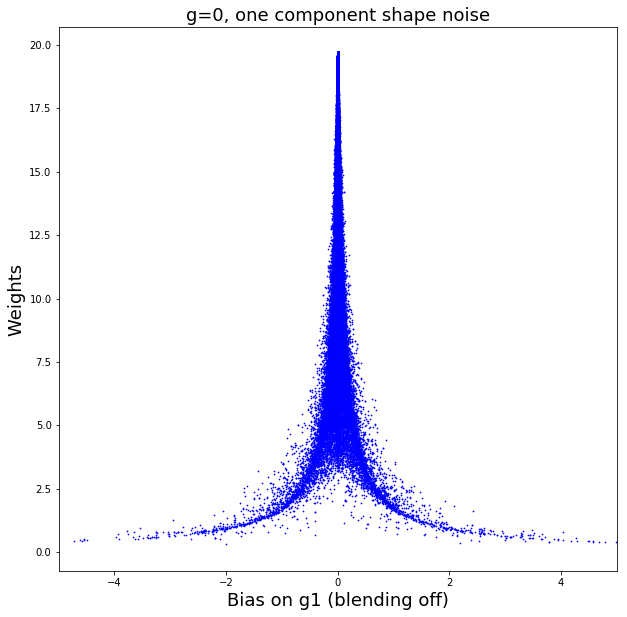

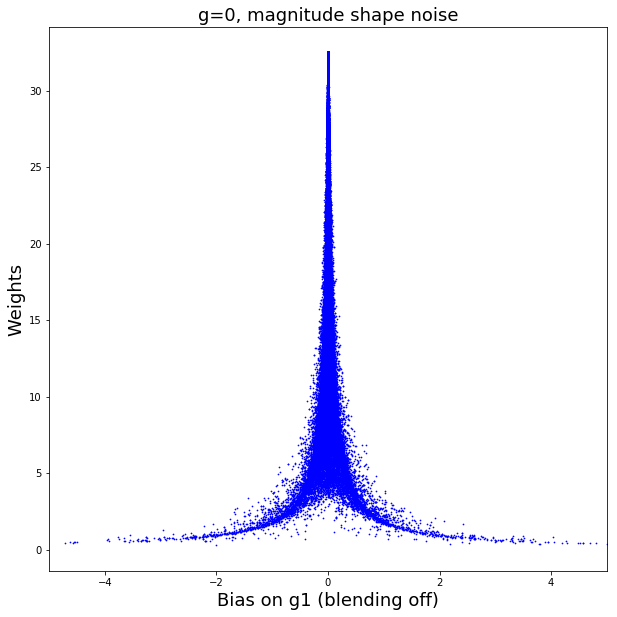

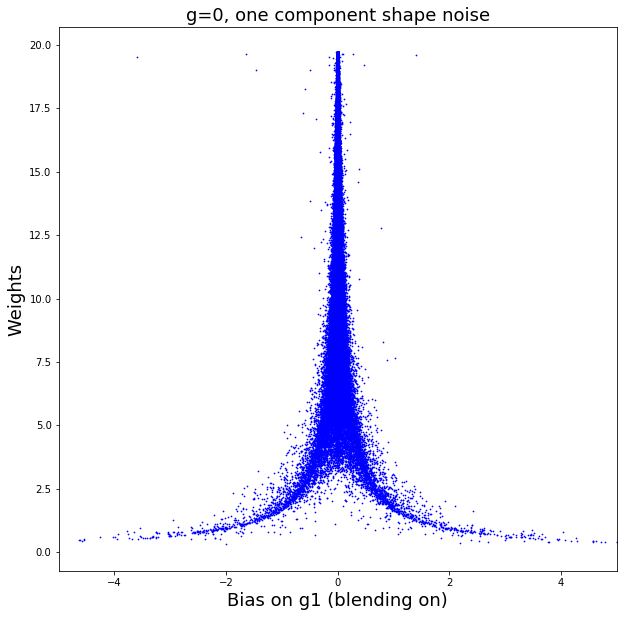

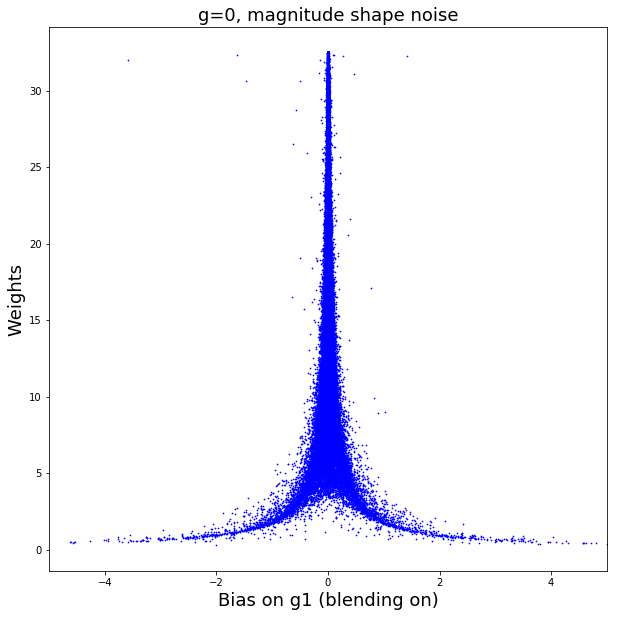

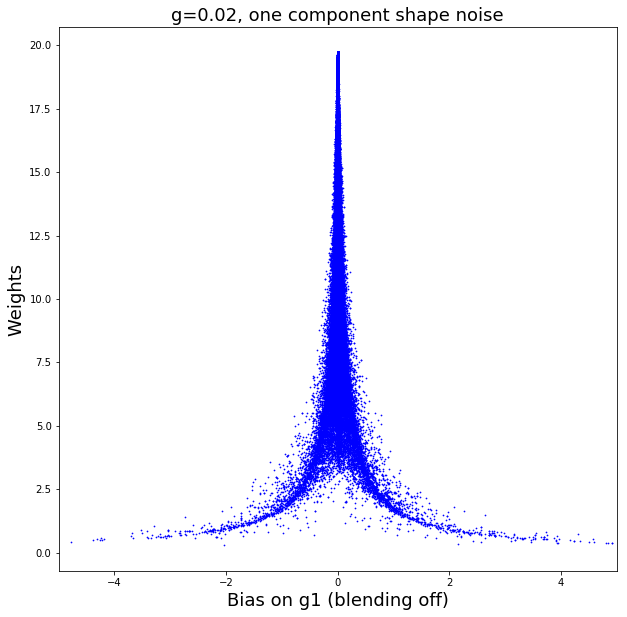

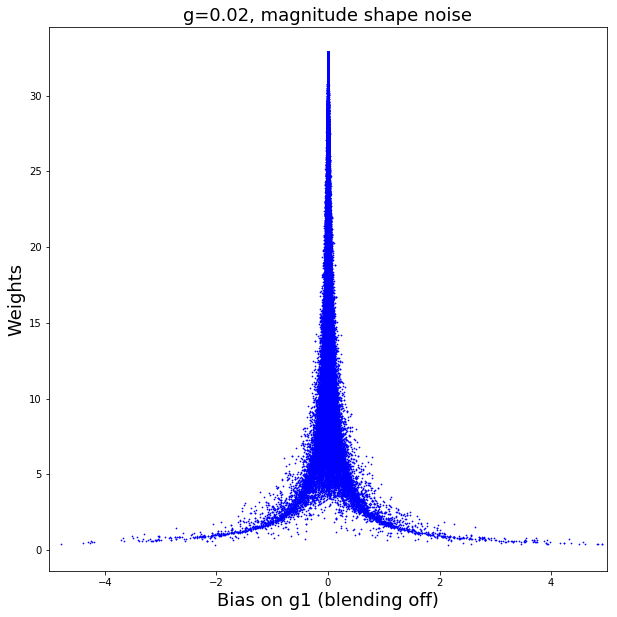

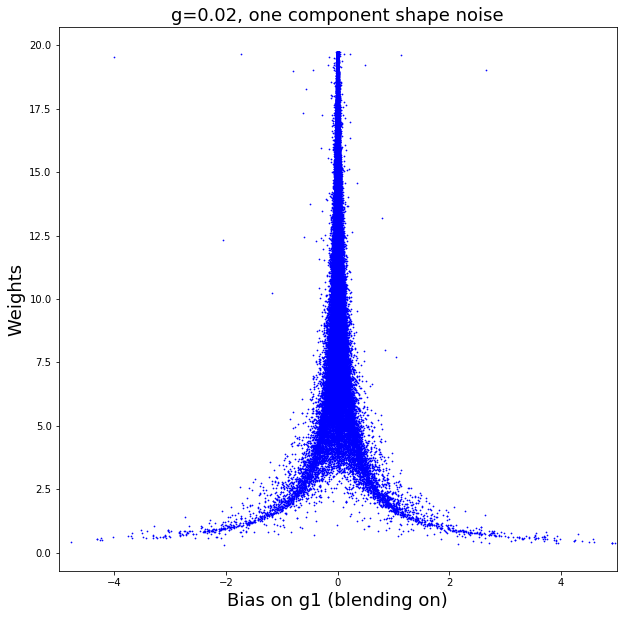

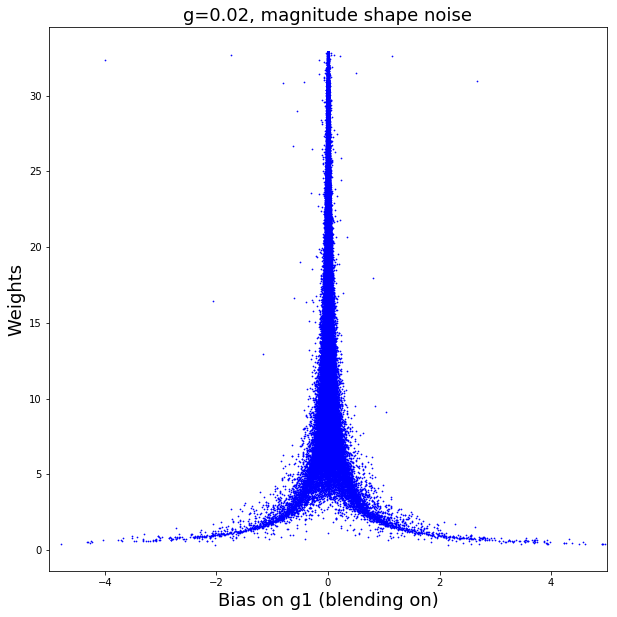

In [216]:
weights_bias_scatter(scats, 4, '1', 'iso','component', xlabel='Bias on g1 (blending off)', title='g=0, one component shape noise')
weights_bias_scatter(scats, 4, '1', 'iso','magnitude', xlabel='Bias on g1 (blending off)', title='g=0, magnitude shape noise')
weights_bias_scatter(scats, 4, '1', 'grp','component', xlabel='Bias on g1 (blending on)', title='g=0, one component shape noise')
weights_bias_scatter(scats, 4, '1', 'grp','magnitude', xlabel='Bias on g1 (blending on)', title='g=0, magnitude shape noise')
weights_bias_scatter(scats, 8, '1', 'iso','component', xlabel='Bias on g1 (blending off)', title='g=0.02, one component shape noise')
weights_bias_scatter(scats, 8, '1', 'iso','magnitude', xlabel='Bias on g1 (blending off)', title='g=0.02, magnitude shape noise')
weights_bias_scatter(scats, 8, '1', 'grp','component', xlabel='Bias on g1 (blending on)', title='g=0.02, one component shape noise')
weights_bias_scatter(scats, 8, '1', 'grp','magnitude', xlabel='Bias on g1 (blending on)', title='g=0.02, magnitude shape noise')

In [ ]:
n

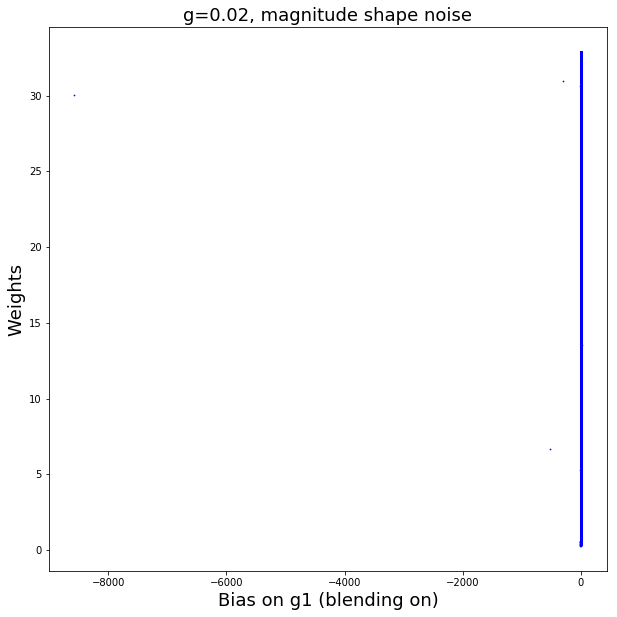

In [252]:
weights_bias_scatter(scats, 8, '1', 'grp','magnitude', xlabel='Bias on g1 (blending on)', title='g=0.02, magnitude shape noise', xlim=None)

(array([8.700e+04, 2.527e+04, 4.924e+03, 1.071e+03, 3.330e+02, 2.110e+02,
        8.800e+01, 2.500e+01, 2.000e+01, 4.000e+00]),
 array([5.1398885e-05, 1.9464946e-01, 3.8924754e-01, 5.8384562e-01,
        7.7844363e-01, 9.7304171e-01, 1.1676397e+00, 1.3622378e+00,
        1.5568359e+00, 1.7514340e+00, 1.9460320e+00], dtype=float32),
 <a list of 10 Patch objects>)

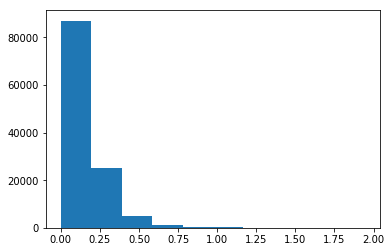

In [257]:
plt.hist(scats[8]['dg1_grp'])

(array([1.09382e+05, 5.23800e+03, 1.96800e+03, 9.54000e+02, 6.51000e+02,
        3.94000e+02, 1.06000e+02, 4.00000e+01, 1.14000e+02, 9.90000e+01]),
 array([  1. ,  61.8, 122.6, 183.4, 244.2, 305. , 365.8, 426.6, 487.4,
        548.2, 609. ]),
 <a list of 10 Patch objects>)

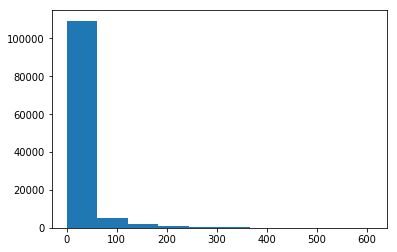

In [259]:
plt.hist(scats[4]['grp_size'])

In [256]:
preamble.down_cut(scats[8], 'bias_g1_grp', -1000)

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402700857466,402700140027,77,11,1,1035,1066,1415,1434,0.96156365,0.038436327,-149.79222,-1514.9642,1.5986731,23.44294,0.5132847,298381.34,0.4602494,0.62190837,0.5243325,-0.13162452,0.8428366,0.25132927,-0.1229751,0.8353423,0.99641746,67.11807,66.36376,66.36358,42.57243,41.459972,0.058854748,0.05349237,0.026905255,0.05948415,0.05382759,0.027255014,0.5148453,0.8272377,-0.20768552,0.0,0.0,160.21306,-0.0037704015,0.0046858815,-0.001205049,-6.90836e-08,6.410779e-09,-1175424900.0,-5519.076,-8576.44,-3605.5122,2416.5967,261.7914,2030,False


In [21]:
scats[4][scats[4]['grp_id'] == 402700140027]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402700246589,402700140027,77,1,1,902,935,1238,1270,0.94067144,0.05932856,-176.19765,-1549.08,0.6597126,21.790823,0.89626503,1366527.6,0.5316925,0.5655117,0.0066249957,-0.24808009,0.6850731,0.41265222,-0.77204883,0.8283183,0.9994504,286.65585,274.41458,274.4144,172.70119,172.69814,0.008893585,0.006673053,0.007704186,0.008893793,0.0066731637,0.0077042677,0.5450727,0.012187901,-0.45814288,0.0,0.0,41.574562,-5.9008147e-05,1.2733518e-06,-4.7714064e-05,1.2875775e-10,9.689739e-11,41.299484,-5.9397644e-05,1.1781909e-06,-4.80151e-05,-3.053953e-08,-1.7282552e-08,2279,False
402700857466,402700140027,77,11,1,1035,1066,1415,1434,0.96156365,0.038436327,-149.79222,-1514.9642,1.5986731,23.44294,0.5132847,298381.34,0.46015733,0.6118579,0.50931984,-0.13437444,0.82650155,0.25619406,-0.12897663,0.83122915,0.9966413,67.43039,66.66593,66.665764,42.77395,42.772404,0.057377946,0.0520439,0.026899636,0.057378955,0.052044425,0.026900375,0.5125568,0.81264263,-0.21439849,0.0,0.0,163.40005,-0.0035402416,0.004436775,-0.0011706688,5.078824e-07,1.7728166e-08,163.42879,-0.0035402195,0.0044368636,-0.0011707001,4.788694e-07,1.2866492e-08,1968,False


(array([3.0000e+00, 3.0000e+00, 4.1000e+01, 2.3200e+02, 1.0080e+03,
        3.3980e+03, 9.1300e+03, 2.1500e+04, 4.2220e+04, 4.1411e+04]),
 array([15.05752 , 16.148193, 17.238869, 18.329542, 19.420218, 20.510891,
        21.601564, 22.69224 , 23.782913, 24.873589, 25.964262],
       dtype=float32),
 <a list of 10 Patch objects>)

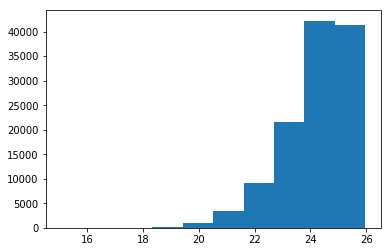

In [275]:
plt.hist(scats[8]['ab_mag'])

In [271]:
preamble.up_cut(scats[8],'grp_size', 77)

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,hsm_sigm,hsm_e1,hsm_e2,g1_fit,g2_fit,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
2200000127,2200000127,126,0,1,900,1064,839,1002,1.0,0.0,1636.4316,-175.80096,0.3179322,15.25077,0.26914215,564468540.0,0.41209078,0.43133032,0.07820486,0.1987031,0.51189536,0.33174515,0.5979199,0.7505697,0.99998826,134158.53,22518.125,22517.707,22261.78,19154.195,7.2298644e-05,5.6285546e-05,6.220121e-05,8.113801e-05,6.799392e-05,6.796056e-05,0.49188614,0.14882381,0.37819633,0.0,0.0,0.30300722,-7.942318e-09,1.3873208e-09,3.9380454e-09,-3.658976e-15,5.9676406e-15,-5664.072,-1.0086474e-05,-4.3085065e-06,-2.7018912e-06,-6.5441263e-06,-2.0792975e-06,1017,False
2200000240,2200000240,335,0,1,721,896,1199,1372,1.0,0.0,881.7892,-1182.8358,0.155619,15.05752,0.29692364,674434240.0,0.78508854,1.1394302,0.5439229,0.24558719,1.5623589,0.39450863,0.2120549,1.1101905,0.9999951,115135.29,24165.467,24165.277,23607.395,23278.678,6.614381e-05,5.3429576e-05,3.2499913e-05,6.870429e-05,5.5493532e-05,3.423635e-05,0.6721835,0.8048404,0.36338913,0.0,0.0,0.38587332,-5.6927516e-09,5.433811e-09,2.5157587e-09,-7.6212245e-16,3.8431018e-16,-695.9091,-1.9878808e-06,1.3506963e-06,1.1475103e-06,7.3961695e-07,-4.7385083e-07,2120,False
2200002173,2200002173,226,0,1,1036,1336,291,591,0.0033241815,0.9966758,957.32996,448.2227,0.3015593,17.406242,0.56092644,77526584.0,2.418913,2.4206412,0.026226992,-0.0051321285,2.4844444,2.3551102,-0.09661971,2.4968107,0.9987094,6120.3726,4137.787,4137.547,1812.0739,1695.1447,0.00081919157,0.0003630469,0.0003627394,0.0008691858,0.0003815463,0.00037203924,0.71369755,0.04887822,-0.008317617,0.0,0.0,10.116116,6.681474e-08,2.7089082e-09,-1.4517539e-09,7.987483e-13,-5.5851705e-13,-7163.2344,-0.00013373977,-7.735273e-06,1.7567632e-05,9.029706e-07,-2.6521482e-06,204,False
2200002346,2200002346,174,0,1,696,885,76,254,0.091344774,0.9086552,1238.2198,753.05304,0.2437696,17.79443,0.5591545,54222020.0,0.8702887,0.9064958,0.032900315,0.19913916,1.0679258,0.70922756,0.7035313,1.0775884,0.99567217,8417.693,4662.3706,4658.0186,2592.8757,2386.5024,0.00081100443,0.00035576348,0.00041855243,0.00086387986,0.0003682502,0.0004431527,0.51957124,0.06814788,0.46505386,0.0,0.0,3.4024065,-3.7567357e-08,1.04883355e-08,1.0922418e-07,2.9409968e-12,4.2920672e-13,-6530.666,-0.00026713192,0.00011742419,3.7393198e-05,-1.3269362e-06,4.928588e-06,1,False
2200002568,2200002568,136,0,1,525,614,339,428,0.9971504,0.0028495882,473.91705,-1723.2573,0.6935104,17.477385,0.32832336,72609550.0,0.5490263,0.70252913,-0.025839237,0.49091375,0.9404002,0.3205336,0.8116914,0.88540834,0.9999992,15092.928,6833.4023,6833.4023,6080.288,6079.1177,0.00031671947,0.00014818557,0.00027853288,0.00031679525,0.0001482167,0.00027855777,0.55743265,-0.041859966,0.795236,0.0,0.0,1.2928158,-1.1329064e-07,-9.69304e-09,1.2675332e-07,-3.2219236e-14,-6.414184e-14,-7.0755744,-2.9168098e-07,-4.608843e-08,-4.2367724e-08,-3.469006e-08,-3.2411858e-08,439,False
2200002791,2200002791,78,0,1,1300,1469,635,797,0.5459817,0.4540183,1357.0583,-576.6649,0.1478662,17.699835,0.45048904,59158024.0,0.832932,0.8444366,0.09063103,-0.074180834,0.9369319,0.74047613,-0.34295782,1.0406835,0.99995035,9986.541,5327.597,5327.594,4010.9973,3990.4177,0.0004234928,0.0002837811,0.000283695,0.0004256361,0.00028587476,0.00028419952,

# Bootstrapped histograms 

## Blending off 

In [234]:
wmean1_iso = wmean(orig_ids, scats[4], '1','iso', 'component')
wmean2_iso = wmean(orig_ids, scats[8], '1','iso', 'component')

In [230]:
wmeans_iso = boots_fnc(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','iso','component'])

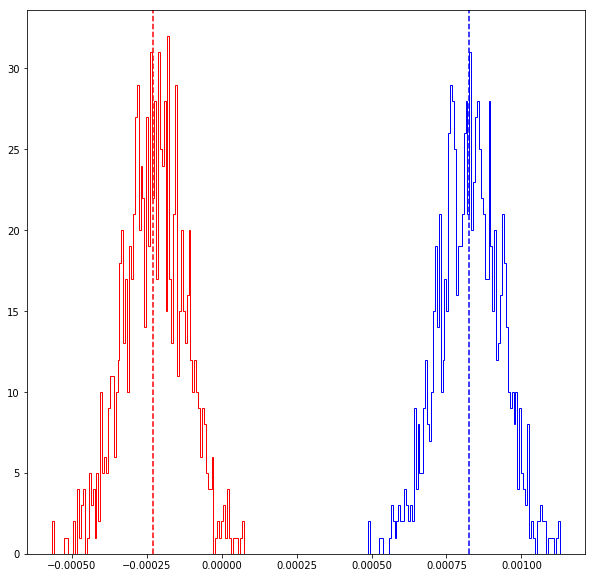

In [236]:
plt.figure(figsize=(10,10));
plt.hist(wmeans_iso[0], color='r', histtype='step', bins=100);
plt.hist(wmeans_iso[1], color='b', histtype='step', bins=100);
plt.axvline(wmean1_iso, c='r',linestyle='--')
plt.axvline(wmean2_iso, c='b',linestyle='--')



## Blending on 

In [19]:
wmeans_grp = boots_fnc(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','grp','component'])

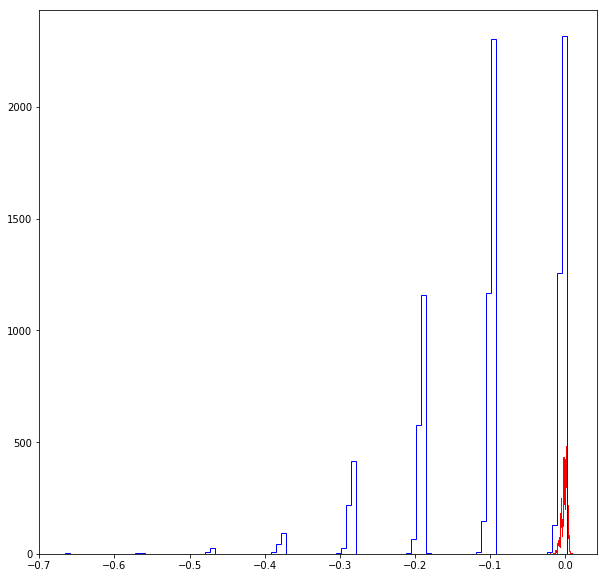

In [243]:
plt.figure(figsize=(10,10));
plt.hist(wmeans_grp[0], color='r', histtype='step', bins=100);
plt.hist(wmeans_grp[1], color='b', histtype='step', bins=100);

In [246]:
wmeans_grp_magnitude = boots_fnc(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','grp','component'])

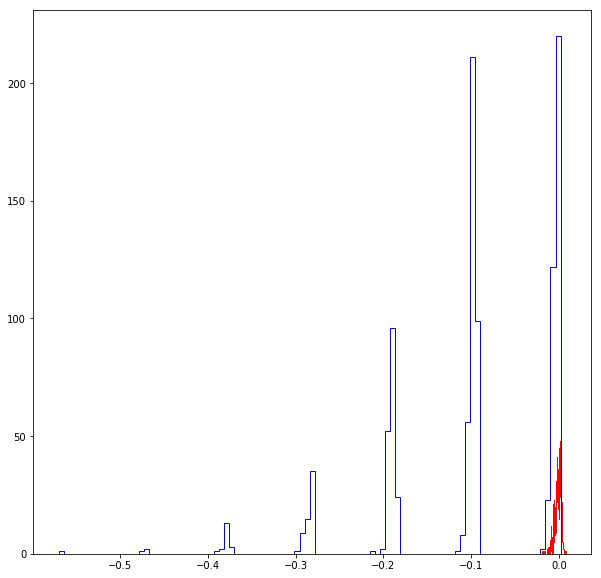

In [247]:
plt.figure(figsize=(10,10));
plt.hist(wmeans_grp_magnitude[0], color='r', histtype='step', bins=100);
plt.hist(wmeans_grp_magnitude[1], color='b', histtype='step', bins=100);

# Where does this lie in the quantile space 

In [118]:
ps = np.linspace(0, 0.5, 51)
orig_ids = list(range(len(scats[4])))

In [206]:
def quantile_summary(ps, means1, means2, errors1, errors2, wmean1, wmean2, wmean1_mag, wmean2_mag,
                    wmean1_error, wmean2_error, wmean1_mag_error, wmean2_mag_error, legend_size=10,labels_wmean=['']*4): 
    plt.figure(figsize=(12,12))
    

    for p, mean in zip(ps, means1): 
        if mean > 0:
            plt.plot(p, mean, 'ro', markersize=8)
        else: 
            plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='r', markersize=8)



    for p, mean in zip(ps, means2): 
        if mean > 0:
            plt.plot(p, mean, 'bo', markersize=8)
        else: 
            plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='b', markersize=8)
            
    
    red_dot_fill, = plt.plot([], [], 'ro')
    red_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='r')
    blue_dot, = plt.plot([],[], 'bo')
    blue_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='b', markersize=8)
    red_diamonds, = plt.plot(ps, errors1, 'r+', label= 'error of mean g=0')
    blue_diamonds, = plt.plot(ps, errors2, 'bx', label= 'error of means g=0.02')
    

    red_line = plt.axhline(np.absolute(wmean1), c='r')
    red_line_dashed = plt.axhline(wmean1_error, c='r', linestyle='--')

    red_dashdot = plt.axhline(np.absolute(wmean1_mag), c='r', linestyle='dashdot')
    red_line_dotted = plt.axhline(wmean1_mag_error, c='r', linestyle='dotted')


    blue_line = plt.axhline(np.absolute(wmean2), c='b')
    blue_line_dashed = plt.axhline(wmean2_error, c='b', linestyle='--')

    blue_line_dashdot = plt.axhline(np.absolute(wmean2_mag), c='b', linestyle='dashdot')
    blue_line_dotted = plt.axhline(wmean2_mag_error, c='b', linestyle='dotted')

    plt.legend([red_dot_fill, red_dot_nofill, red_diamonds, 
                red_line, red_line_dashed, red_dashdot, red_line_dotted, 
                blue_dot, blue_dot_nofill, blue_diamonds, 
                blue_line, blue_line_dashed, blue_line_dashdot, blue_line_dotted], 
               ["Means zero shear (positive)", "Means zero shear (negative)", "corresponding error", 
                f"Weighted mean zero shear ({labels_wmean[0]})", "corresponding error", 
                f"Weighted mean,g=0, sn magnitude ({labels_wmean[1]})", "corresponding error",
                "Means g=0.02 (positive)",  "Means g=0.02 (negative)",  "Errors on mean g=0.02", 
                f"weighted mean g=0.02 ({labels_wmean[2]})", "corresponding error", 
                f"weighted mean,g=0.02, sn magnitude ({labels_wmean[3]})", "corresponding error"
               ], loc='best', prop={"size":legend_size}, bbox_to_anchor=(1,1))
    
    plt.xlabel('quantile', size=22)
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.yscale('log')
    

## Blending off 

In [ ]:
means1_iso = [] 
errors1_iso = [] 
means2_iso = [] 
errors2_iso = [] 

for p in tqdm(ps): 
    means1_iso.append(clipped_mean(orig_ids, scats[4], 'bias_g1', p))
    means2_iso.append(clipped_mean(orig_ids, scats[8], 'bias_g1', p))
    errors_p = get_errors(orig_ids, [scats[4],scats[8]], clipped_mean, N=1000, args=['bias_g1',p])
    errors1_iso.append(errors_p[0])
    errors2_iso.append(errors_p[1])

wmean1_iso = wmean(orig_ids, scats[4], '1', 'iso', 'component')
wmean1_mag_iso = wmean(orig_ids, scats[4], '1', 'iso', 'magnitude')

wmean2_iso =  wmean(orig_ids, scats[8], '1', 'iso', 'component')
wmean2_mag_iso = wmean(orig_ids, scats[8], '1', 'iso', 'magnitude')

wmean1_error_iso,wmean2_error_iso = get_errors(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','iso','component'])
wmean1_mag_error_iso,wmean2_mag_error_iso = get_errors(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','iso','magnitude'])
print()
print(wmean1_iso, wmean1_mag_iso, wmean2_iso, wmean2_mag_iso)
print(wmean1_error, wmean1_mag_error, wmean2_error,  wmean2_mag_error)

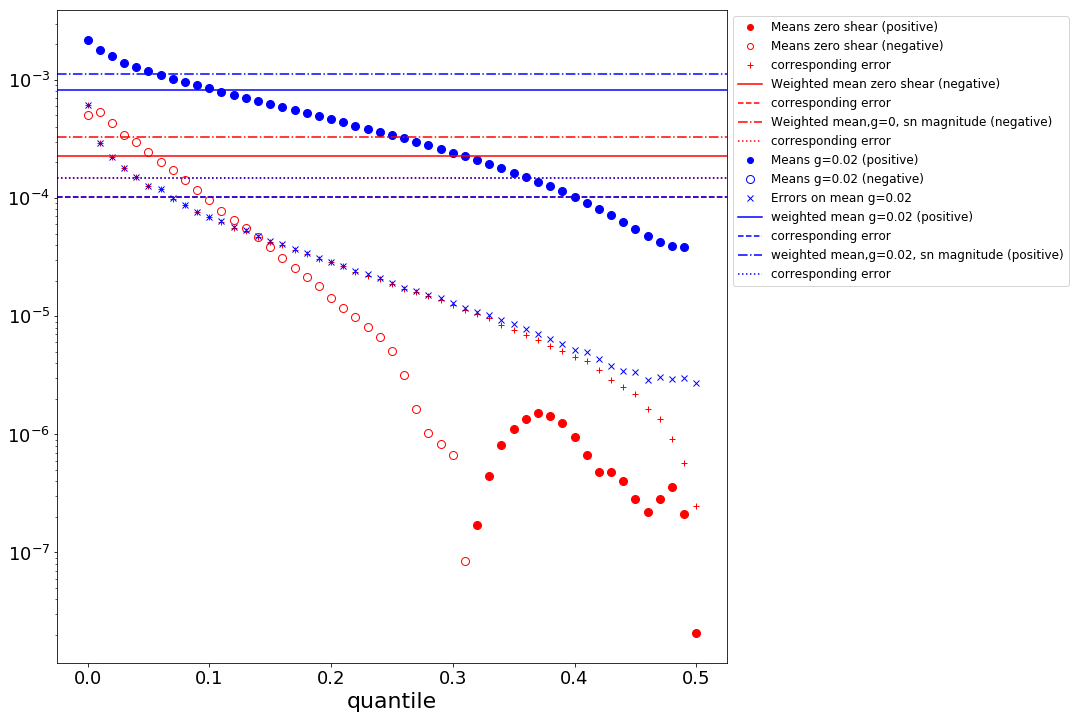

In [207]:
quantile_summary(ps, means1_iso, means2_iso, errors1_iso, errors2_iso, 
                 wmean1_iso, wmean2_iso, wmean1_mag_iso, wmean2_mag_iso,
                 wmean1_error_iso, wmean2_error_iso, wmean1_mag_error_iso, wmean2_mag_error_iso, legend_size=12, 
                 labels_wmean=['negative', 'negative', 'positive', 'positive'])

## Blending on 

In [150]:
means1_grp = [] 
errors1_grp = [] 
means2_grp = [] 
errors2_grp = [] 

for p in tqdm(ps): 
    means1_grp.append(clipped_mean(orig_ids, scats[4], 'bias_g1_grp', p))
    means2_grp.append(clipped_mean(orig_ids, scats[8], 'bias_g1_grp', p))
    errors_p = get_errors(orig_ids, [scats[4],scats[8]], clipped_mean, N=1000, args=['bias_g1_grp',p])
    errors1_grp.append(errors_p[0])
    errors2_grp.append(errors_p[1])

100%|██████████| 51/51 [18:29<00:00, 18.92s/it]


In [208]:
wmean1_grp = wmean(orig_ids, scats[4], '1', 'grp', 'component')
wmean1_mag_grp = wmean(orig_ids, scats[4], '1', 'grp', 'magnitude')

wmean2_grp =  wmean(orig_ids, scats[8], '1', 'grp', 'component')
wmean2_mag_grp = wmean(orig_ids, scats[8], '1', 'grp', 'magnitude')

wmean1_error_grp,wmean2_error_grp = get_errors(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','grp','component'])
wmean1_mag_error_grp,wmean2_mag_error_grp = get_errors(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','grp','magnitude'])
print()
print(wmean1_grp, wmean2_grp, wmean1_mag_grp, wmean2_mag_grp)
print(wmean1_error_grp, wmean2_error_grp, wmean1_mag_error_grp, wmean2_mag_error_grp)


-0.0018393212 -0.09775978 -0.0011858193 -0.08980672
0.0034100558 0.08962568 0.0035345966 0.08130316


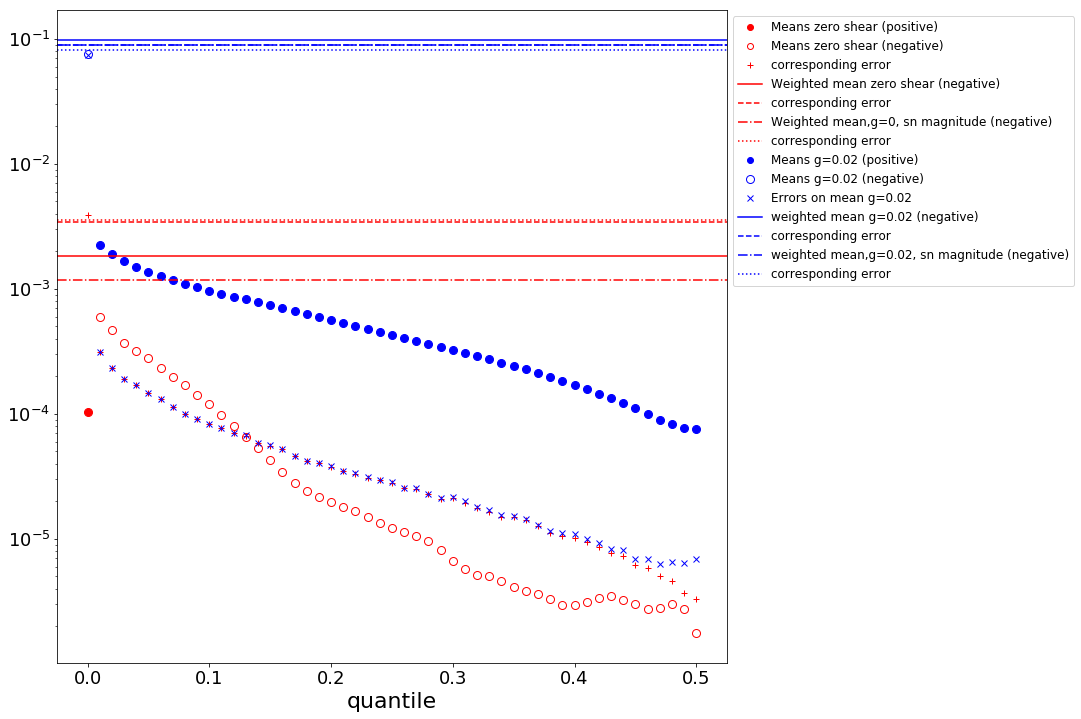

In [209]:
quantile_summary(ps, means1_grp, means2_grp, errors1_grp, errors2_grp, 
                 wmean1_grp, wmean2_grp, wmean1_mag_grp, wmean2_mag_grp,
                 wmean1_error_grp, wmean2_error_grp, wmean1_mag_error_grp, wmean2_mag_error_grp, 
                 labels_wmean=['negative', 'negative', 'negative', 'negative'], legend_size=12)

In [217]:
wmean(orig_ids, scats[8], '1', 'grp', 'component')

-0.09775978

In [220]:
wmeans = boots_fnc(orig_ids, [scats[4],scats[8]], wmean, N=1000, args=['1','grp','component'])

[-0.00052461267,
 -0.002964899,
 -0.000738715,
 -0.009035222,
 -0.0018586944,
 0.00012474816,
 -0.0025947078,
 0.0013160495,
 0.00021327597,
 0.00010309909,
 -0.0070783603,
 -0.0011786486,
 -0.0035202254,
 -0.009628891,
 -0.0038114747,
 0.0021552772,
 -0.0031564957,
 -0.0030625584,
 -0.00022226425,
 -0.002632553,
 -0.0038124307,
 -0.008710989,
 -0.006017041,
 -0.0010882253,
 -0.004722902,
 -0.0043769674,
 -0.0024140743,
 -0.005137661,
 -0.0007072127,
 -0.0018062313,
 -3.4355737e-05,
 -0.007906887,
 -0.0026151482,
 -0.001974291,
 -0.0037371975,
 0.00286502,
 -0.0008096076,
 -0.013077633,
 -0.00562053,
 -0.007175697,
 0.00095645356,
 -0.00014670566,
 -0.0006621898,
 -0.0052799773,
 0.0012221526,
 -0.003070175,
 -0.0042395415,
 -0.00021681754,
 -0.0065520275,
 -0.0021881799,
 -0.0036456492,
 -0.0023821907,
 -0.0028509374,
 -0.003677206,
 0.0015901513,
 0.0028809267,
 -0.0055627674,
 0.0015228807,
 0.002667733,
 -0.00387793,
 -0.004652093,
 -0.0028925955,
 0.0010141884,
 0.000647939,
 -0.0

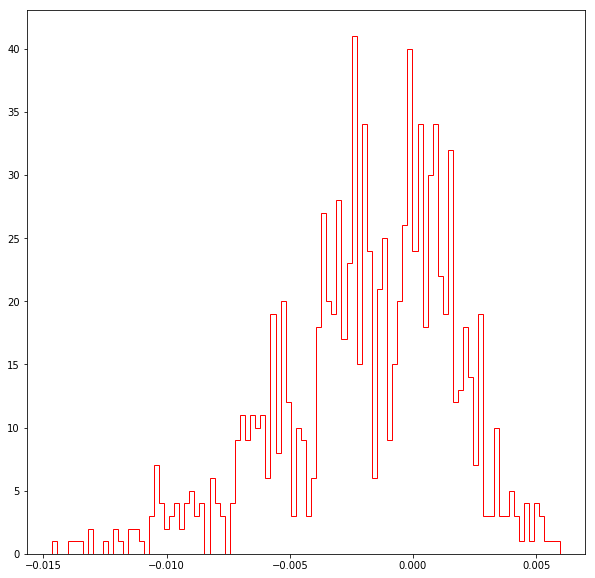

In [227]:
plt.figure(figsize=(10,10));
plt.hist(wmeans[0], color='r', histtype='step', bins=100);
# plt.hist(wmeans[1], color='b', histtype='step', bins=100);

# New money plot 

In [130]:
boot_wmeans1_iso = boots_fnc(orig_ids, scats, wmean, N=1000,args=['1','iso','component'])
boot_wmeans1_mag_iso = boots_fnc(orig_ids, scats, wmean, N=1000,args=['1','iso','magnitude'])

In [131]:
boot_wmeans2_grp = boots_fnc(orig_ids, scats, wmean, N=1000,args=['1','grp','component'])
boot_wmeans2_mag_grp = boots_fnc(orig_ids, scats, wmean, N=1000,args=['1','grp','magnitude'])